steps_original 600
losses_original 600
queue_delays_original 600
packet_lengths_original 600
losses_llm 600
queue_delays_llm 600
packet_lengths_llm 600
     Original Loss  Original Queue Delay  Original Packet Length  LLM Loss  \
200       0.681759                   0.0                  1500.0  0.681759   
201       0.681759                   0.0                  1500.0  0.681795   
202       0.681759                   0.0                  1500.0  0.681754   
203       0.681759                   0.0                  1500.0  0.681757   
204       0.681759                   0.0                  1500.0  0.681758   
205       0.681759                   0.0                  1500.0  0.681758   
206       0.681759                   0.0                  1500.0  0.681759   
207       0.681759                   0.0                  1500.0  0.681759   
208       0.681759                   0.0                  1500.0  0.681759   
209       0.681759                   0.0                  1500.0  0.

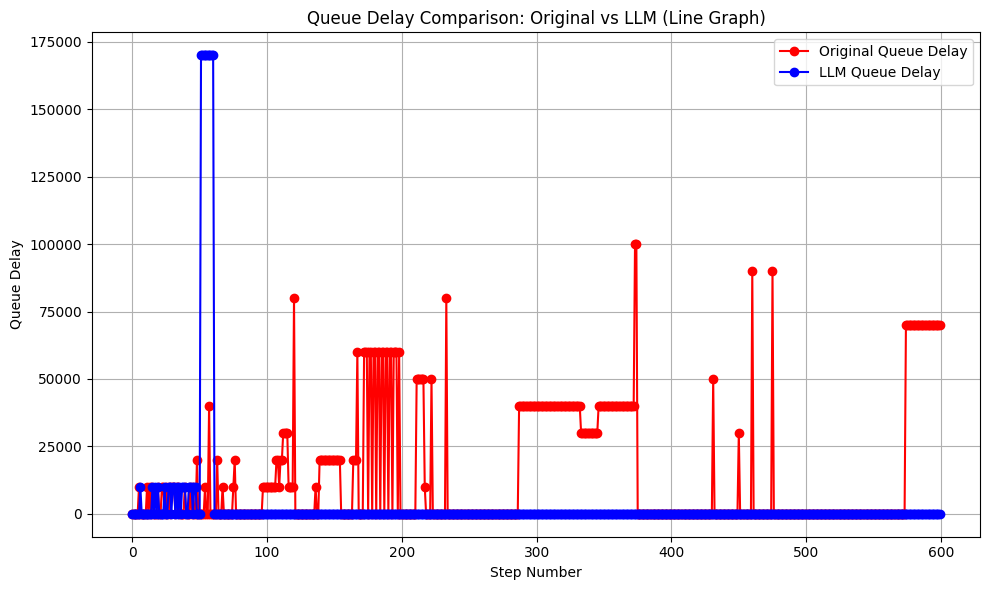

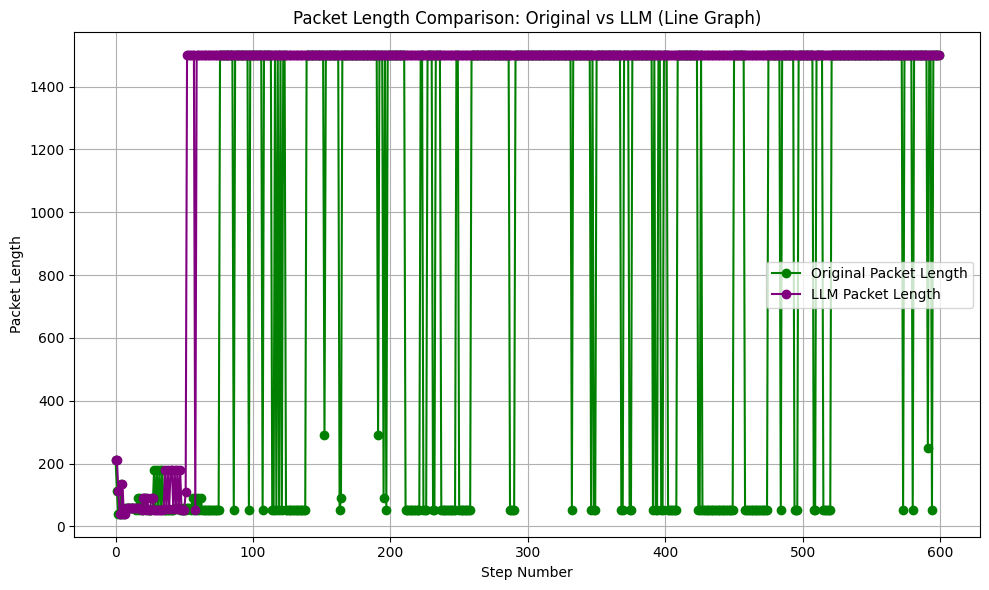

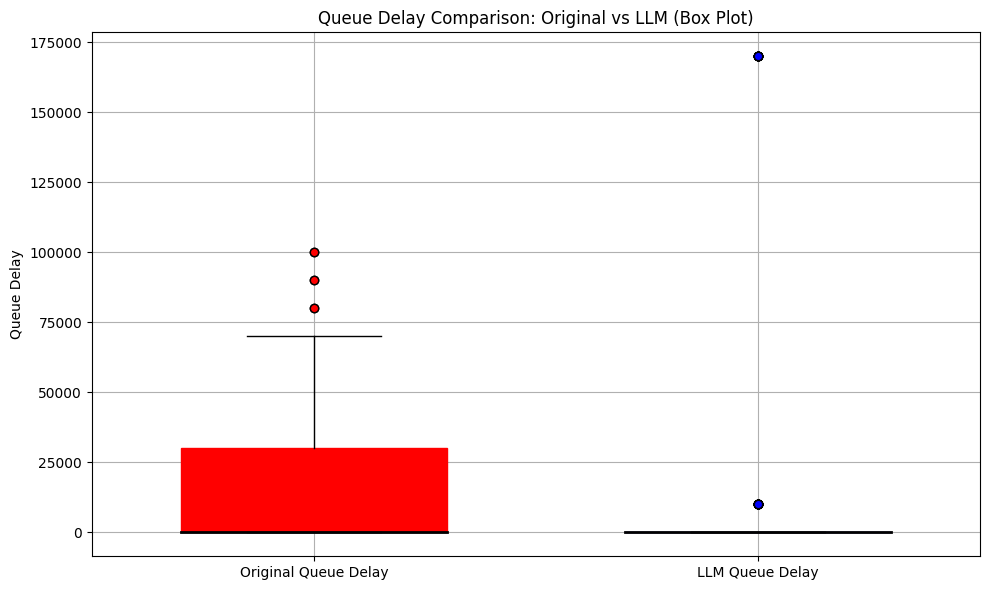

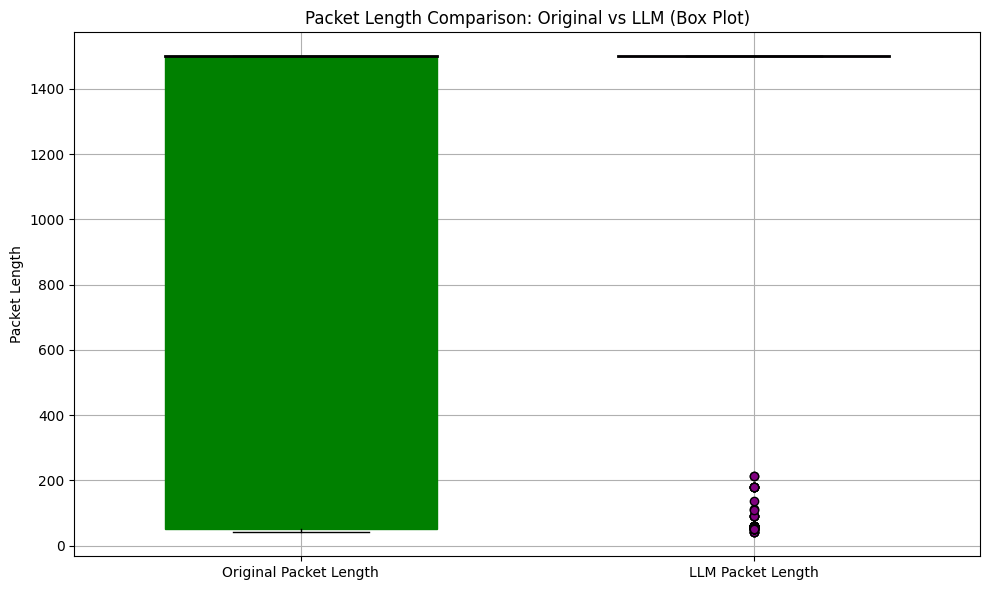

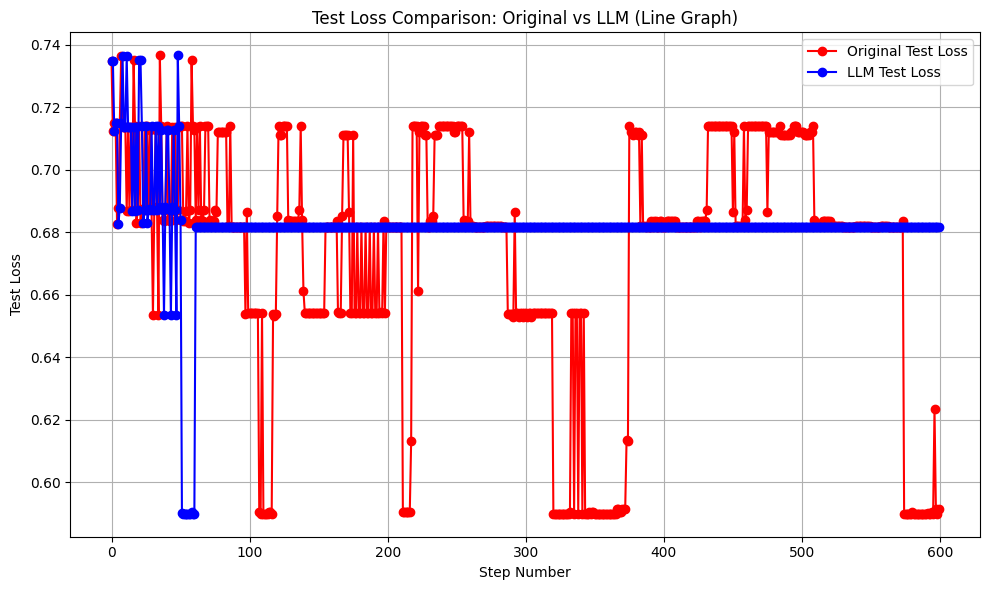

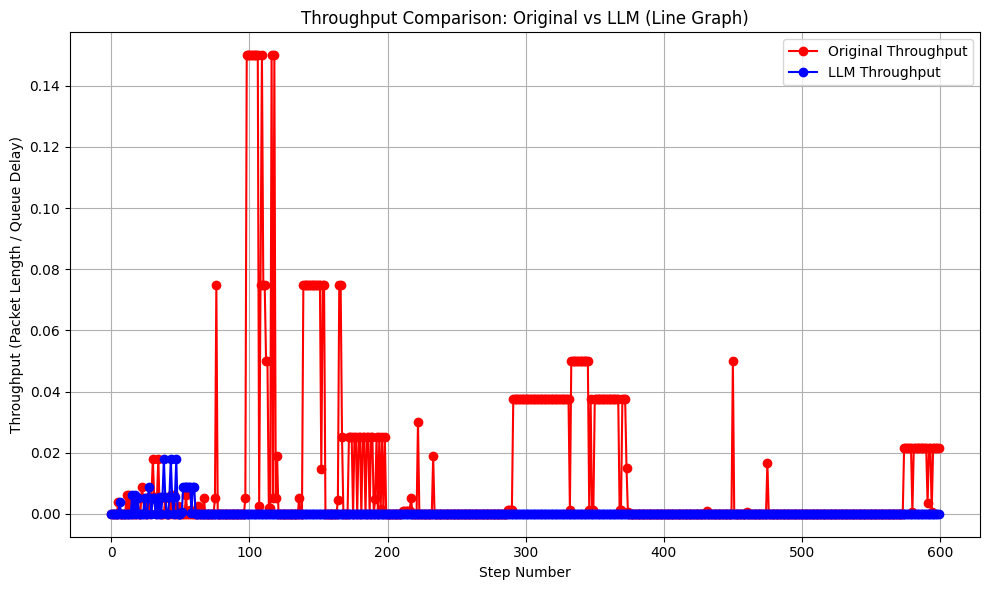

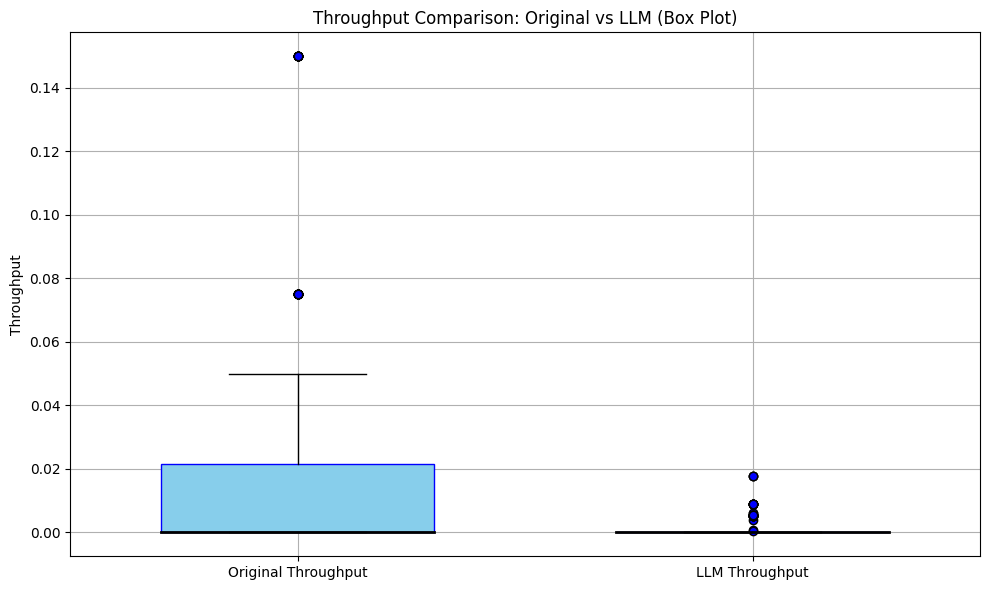

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt


col_dict = {
    'queue_type': 0,
    'burst_allowance': 1,
    'drop_probability': 2,
    'current_queue_delay': 3,
    'accumulated_probability': 4,
    'length_in_bytes': 5,
    'packet_length': 6
}

# Function to load logs from a JSON file
def load_logs(log_file):
    with open(log_file, 'r') as file:
        return json.load(file)

# Function to extract steps, queue delays, packet lengths, and test losses from the logs
def extract_data(logs):
    steps, queue_delays, packet_lengths, losses = [], [], [], []
    
    for step_log in logs['steps']:
        steps.append(step_log['step'])  # Extract step number
        queue_delay = step_log['states'][0][0][col_dict['current_queue_delay']]  # Extract queue delay
        packet_length = step_log['states'][0][0][col_dict['packet_length']]  # Extract packet length
        queue_delays.append(queue_delay)  # Store queue delay
        packet_lengths.append(packet_length)  # Store packet length
        losses.append(step_log['test_loss'])  # Extract test loss
    
    return steps, queue_delays, packet_lengths, losses


# Function to create a DataFrame with the required columns
def create_dataframe(steps_original, queue_delays_original, packet_lengths_original, losses_original, 
                     steps_llm, queue_delays_llm, packet_lengths_llm, losses_llm):
    # Determine the shortest length among the lists
    min_length = min(len(steps_original), len(queue_delays_original), len(packet_lengths_original), 
                     len(losses_original), len(steps_llm), len(queue_delays_llm), 
                     len(packet_lengths_llm), len(losses_llm))
    
    # Slice each list to ensure the lengths are consistent
    steps_original = steps_original[:min_length]
    queue_delays_original = queue_delays_original[:min_length]
    packet_lengths_original = packet_lengths_original[:min_length]
    losses_original = losses_original[:min_length]
    
    steps_llm = steps_llm[:min_length]
    queue_delays_llm = queue_delays_llm[:min_length]
    packet_lengths_llm = packet_lengths_llm[:min_length]
    losses_llm = losses_llm[:min_length]

    # Create a dictionary with the required columns
    data = {
        'Original Loss': losses_original,
        'Original Queue Delay': queue_delays_original,
        'Original Packet Length': packet_lengths_original,
        'LLM Loss': losses_llm,
        'LLM Queue Delay': queue_delays_llm,
        'LLM Packet Length': packet_lengths_llm
    }

    # Add throughput calculations as floats
    data['Original Throughput'] = [
        float(packet) / float(delay) if delay != 0 else 0.0 
        for packet, delay in zip(packet_lengths_original, queue_delays_original)
    ]
    data['LLM Throughput'] = [
        float(packet) / float(delay) if delay != 0 else 0.0 
        for packet, delay in zip(packet_lengths_llm, queue_delays_llm)
    ]

    # Create DataFrame with step numbers as index (use original steps)
    df = pd.DataFrame(data, index=steps_original)

    print(df.iloc[200:220])
    
    return df




# Function to plot queue delay comparison using line graph
def plot_queue_delay_line_comparison(df):
    plt.figure(figsize=(10, 6))
    
    # Plot original queue delays (line graph)
    plt.plot(df.index, df['Original Queue Delay'], marker='o', linestyle='-', color='r', label='Original Queue Delay')
    
    # Plot LLM queue delays (line graph)
    plt.plot(df.index, df['LLM Queue Delay'], marker='o', linestyle='-', color='b', label='LLM Queue Delay')
    
    # Add titles and labels
    plt.title('Queue Delay Comparison: Original vs LLM (Line Graph)')
    plt.xlabel('Step Number')
    plt.ylabel('Queue Delay')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Function to plot throughput comparison using a line graph
def plot_throughput_line_comparison(df):
    plt.figure(figsize=(10, 6))
    
    # Plot original throughput (line graph)
    plt.plot(df.index, df['Original Throughput'], marker='o', linestyle='-', color='r', label='Original Throughput')
    
    # Plot LLM throughput (line graph)
    plt.plot(df.index, df['LLM Throughput'], marker='o', linestyle='-', color='b', label='LLM Throughput')
    
    # Add titles and labels
    plt.title('Throughput Comparison: Original vs LLM (Line Graph)')
    plt.xlabel('Step Number')
    plt.ylabel('Throughput (Packet Length / Queue Delay)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Function to plot throughput comparison using a box plot
def plot_throughput_box_comparison(df):
    plt.figure(figsize=(10, 6))
    
    # Box plot for Original Throughput
    plt.boxplot(
        [df['Original Throughput'], df['LLM Throughput']],
        positions=[1, 2],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor='skyblue', color='blue'),
        medianprops=dict(color='black', linewidth=2),
        flierprops=dict(markerfacecolor='blue', marker='o')
    )
    
    # Add titles and labels
    plt.title('Throughput Comparison: Original vs LLM (Box Plot)')
    plt.ylabel('Throughput')
    plt.xticks([1, 2], ['Original Throughput', 'LLM Throughput'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()




# Function to plot packet length comparison using line graph
def plot_packet_length_line_comparison(df):
    plt.figure(figsize=(10, 6))
    
    # Plot original packet lengths (line graph)
    plt.plot(df.index, df['Original Packet Length'], marker='o', linestyle='-', color='g', label='Original Packet Length')
    
    # Plot LLM packet lengths (line graph)
    plt.plot(df.index, df['LLM Packet Length'], marker='o', linestyle='-', color='purple', label='LLM Packet Length')
    
    # Add titles and labels
    plt.title('Packet Length Comparison: Original vs LLM (Line Graph)')
    plt.xlabel('Step Number')
    plt.ylabel('Packet Length')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to plot queue delay comparison using box plot
def plot_queue_delay_box_comparison(df):
    plt.figure(figsize=(10, 6))

    # Box plot for original queue delays
    plt.boxplot([df['Original Queue Delay']], positions=[1], widths=0.6, patch_artist=True, 
                boxprops=dict(facecolor='r', color='r'), medianprops=dict(color='black', linewidth=2), 
                flierprops=dict(markerfacecolor='red', marker='o'))
    
    # Box plot for LLM queue delays
    plt.boxplot([df['LLM Queue Delay']], positions=[2], widths=0.6, patch_artist=True, 
                boxprops=dict(facecolor='b', color='b'), medianprops=dict(color='black', linewidth=2), 
                flierprops=dict(markerfacecolor='blue', marker='o'))

    plt.title('Queue Delay Comparison: Original vs LLM (Box Plot)')
    plt.ylabel('Queue Delay')
    plt.xticks([1, 2], ['Original Queue Delay', 'LLM Queue Delay'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Function to plot packet length comparison using box plot
def plot_packet_length_box_comparison(df):
    plt.figure(figsize=(10, 6))

    # Box plot for original packet lengths
    plt.boxplot([df['Original Packet Length']], positions=[1], widths=0.6, patch_artist=True, 
                boxprops=dict(facecolor='g', color='g'), medianprops=dict(color='black', linewidth=2), 
                flierprops=dict(markerfacecolor='green', marker='o'))
    
    # Box plot for LLM packet lengths
    plt.boxplot([df['LLM Packet Length']], positions=[2], widths=0.6, patch_artist=True, 
                boxprops=dict(facecolor='purple', color='purple'), medianprops=dict(color='black', linewidth=2), 
                flierprops=dict(markerfacecolor='purple', marker='o'))

    plt.title('Packet Length Comparison: Original vs LLM (Box Plot)')
    plt.ylabel('Packet Length')
    plt.xticks([1, 2], ['Original Packet Length', 'LLM Packet Length'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Function to plot loss comparison using line graph
def plot_loss_comparison(df):
    plt.figure(figsize=(10, 6))
    
    # Plot original losses (line graph)
    plt.plot(df.index, df['Original Loss'], marker='o', linestyle='-', color='r', label='Original Test Loss')
    
    # Plot LLM losses (line graph)
    plt.plot(df.index, df['LLM Loss'], marker='o', linestyle='-', color='b', label='LLM Test Loss')
    
    # Add titles and labels
    plt.title('Test Loss Comparison: Original vs LLM (Line Graph)')
    plt.xlabel('Step Number')
    plt.ylabel('Test Loss')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Main code block for loading and plotting original and LLM data
def main():
    # Load and process the original logs
    log_file_original = '/home/wwj/src/L4S-LLM/llm_framework/Logs/eval_logs_original.json'
    custom_logs_original = load_logs(log_file_original)
    steps_original, queue_delays_original, packet_lengths_original, losses_original = extract_data(custom_logs_original)
    
    # Load and process the new logs (LLM)
    log_file_llm = '/home/wwj/src/L4S-LLM/llm_framework/Logs/eval_logs_llm.json'
    custom_logs_llm = load_logs(log_file_llm)
    steps_llm, queue_delays_llm, packet_lengths_llm, losses_llm = extract_data(custom_logs_llm)

    print("steps_original",len(steps_original))
    print("losses_original",len(losses_original))
    print("queue_delays_original",len(queue_delays_original))
    print("packet_lengths_original",len(packet_lengths_original))
    print("losses_llm",len(losses_llm))
    print("queue_delays_llm",len(queue_delays_llm))
    print("packet_lengths_llm",len(packet_lengths_llm))
    
    # Create the DataFrame
    df = create_dataframe(steps_original, queue_delays_original, packet_lengths_original, losses_original,
                          steps_llm, queue_delays_llm, packet_lengths_llm, losses_llm)
    
    print(df['LLM Throughput'].value_counts())

    # Plot queue delay comparison using line graph
    plot_queue_delay_line_comparison(df)
    
    # Plot packet length comparison using line graph
    plot_packet_length_line_comparison(df)
    
    # Plot queue delay comparison using box plot
    plot_queue_delay_box_comparison(df)
    
    # Plot packet length comparison using box plot
    plot_packet_length_box_comparison(df)
    
    # Plot loss comparison
    plot_loss_comparison(df)

    plot_throughput_line_comparison(df)

    plot_throughput_box_comparison(df)

if __name__ == "__main__":
    main()
